# 📊 YouTube Comments Sentiment and Emoji Analysis

This project performs **sentiment analysis**, **emoji frequency analysis**, and **category-based insights** on YouTube comment data using Python, Pandas, TextBlob, Seaborn, and Matplotlib.

## 🧠 Features

- ✅ Text preprocessing and sentiment scoring with **TextBlob**
- ✅ Emoji extraction and frequency analysis with the **emoji** library
- ✅ Visualization using **Seaborn** and **Matplotlib**
- ✅ Category mapping using video `category_id` to `category_name`
- ✅ Merging datasets and handling large CSV files
---

## 🎓 Tutorial Guide

Each step focuses on a different part of the data analysis workflow:

1. **📂 How to Read CSV Data or Load Data**  
   – Load data using Pandas and understand the dataset structure.

2. **🧠 Performing Sentiment Analysis**  
   – Use TextBlob to analyze sentiment polarity and subjectivity.

3. **☁️ Perform WordCloud Analysis**  
   – Generate word clouds from comment text to visualize common words.

4. **🎭 How to Perform Emoji Analysis**  
   – Extract and count emojis using the `emoji` library.

5. **📥 Collect Entire Data from YouTube – Data Collection**  
   – Merge multiple datasets or download additional data.

6. **🗃️ Exporting Your Data into CSV, JSON, Databases**  
   – Save processed data in various formats for future use.

7. **📊 Analyzing the Most Liked Category**  
   – Identify categories with the highest engagement or like counts.

8. **📈 Analyze Whether Audience is Engaged or Not**  
   – Use metrics like comment frequency, likes, and replies.

9. **🔥 Analyzing Trending Videos on YouTube**  
   – Track trends using video metrics and publish dates.

10. **📝 Do Punctuations Have an Impact on Views?**  
   — Investigate if punctuation use correlates with user engagement or sentiment.
---

## 1> Read and Load csv data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UScomments.csv',on_bad_lines='skip')

C:\Users\kumar\AppData\Local\Temp\ipykernel_1764\1280863168.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('UScomments.csv',on_bad_lines='skip')


In [3]:
df.shape

(691400, 4)

In [4]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [5]:
df.isna().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

---

## 2> Perform Sentiment Analysis
    
    In short , Sentiment analysis is all about analyszing sentiments of Users

TextBlob is a simple library for processing textual data. It provides a clean API for common Natural Language Processing (NLP)

In [8]:
from textblob import TextBlob as tb

In [9]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [10]:
tb("Logan Paul it's yo big day ‼️‼️‼️").sentiment

# its a neutral sentence !

Sentiment(polarity=0.0, subjectivity=0.1)

In [11]:
tb("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [12]:
df['Polarity'] = df['comment_text'].apply(
    lambda x: tb(x).sentiment.polarity if isinstance(x,str) else 0
)

In [13]:
df.head()

,video_id,comment_text,likes,replies,Polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [14]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

---

## 3> Wordcloud Analysis of this data.

### Lets perform EDA for the Positve sentences i.e. Polarity value will be 1 

In [15]:
positive_comments = df[df['Polarity'] == 1]
positive_comments.head()

,video_id,comment_text,likes,replies,Polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


### Lets perform EDA for the Negative sentences i.e. Polarity value will be -1 

In [16]:
negative_comments = df[df['Polarity'] == -1]
negative_comments.head()

,video_id,comment_text,likes,replies,Polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [17]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [18]:
type(df['comment_text'])

pandas.core.series.Series

In [19]:
from wordcloud import WordCloud , STOPWORDS

- for wordcloud we need to frame our 'comment_text' of positive_comments dataframe feature into string

In [20]:
total_positive_comments = ' '.join(positive_comments['comment_text'])

In [21]:
word_cloud = WordCloud(stopwords=STOPWORDS).generate(total_positive_comments)

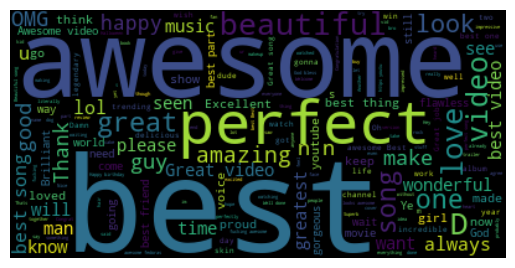

In [22]:
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Conclusion-->>
positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

- for wordcloud we need to frame our 'comment_text' of negative_comments dataframe feature into string

In [23]:
total_negative_comments = ' '.join(negative_comments['comment_text'])

In [24]:
word_cloud_2 = WordCloud(stopwords=STOPWORDS).generate(total_negative_comments)

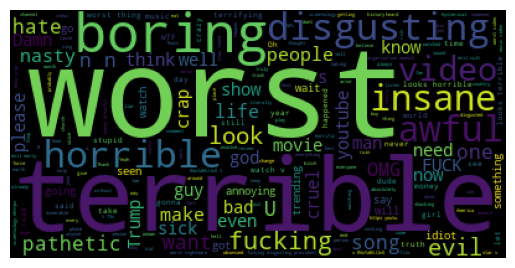

In [25]:
plt.imshow(word_cloud_2)
plt.axis("off")
plt.show()

### Conclusion-->>
Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

---

## 4> Perform Emoji's Analysis

In [26]:
import emoji

In [27]:
df['comment_text'].head()

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
Name: comment_text, dtype: object

In [28]:
total_emoji = [char
               for comment in df['comment_text']
               for char in comment
               if char in emoji.EMOJI_DATA]
total_emoji = pd.Series(total_emoji)
total_emoji.value_counts()

😂    36987
😍    33453
❤    31119
🔥     8694
😭     8398
     ...  
🤬        1
🤪        1
🤟        1
🧢        1
🤭        1
Name: count, Length: 1098, dtype: int64

### for visualizaing top 10 emoji

In [29]:
top_10 = total_emoji.value_counts().head(10)
top_10

😂    36987
😍    33453
❤    31119
🔥     8694
😭     8398
👏     5719
😘     5545
👍     5476
💖     5359
💕     5147
Name: count, dtype: int64

In [30]:
emojis = top_10.index
emojis

Index(['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕'], dtype='object')

In [31]:
freq = top_10.values
freq

array([36987, 33453, 31119,  8694,  8398,  5719,  5545,  5476,  5359,
        5147])

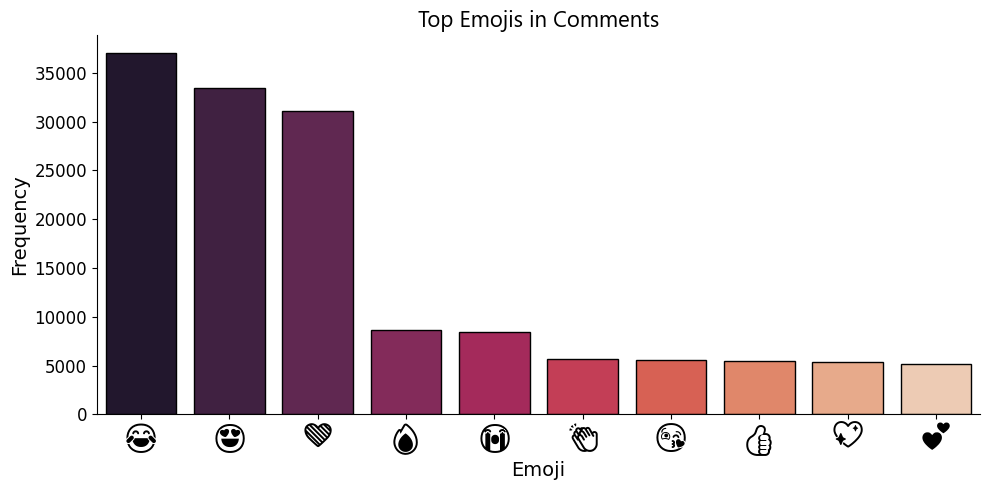

In [97]:
import matplotlib.font_manager as fm

# Load a font that supports emojis
emoji_font_path = "C:/Windows/Fonts/seguiemj.ttf"  # for Windows
emoji_font = fm.FontProperties(fname=emoji_font_path)

colors = sns.color_palette("rocket", len(emojis))

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=emojis, y=freq,hue=emojis,palette=colors,edgecolor='black')


# Set labels with emoji font
plt.xticks(fontproperties=emoji_font, fontsize=20)
plt.yticks(fontsize=12)
plt.xlabel('Emoji', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top Emojis in Comments', fontproperties=emoji_font, fontsize=16)

# Remove top and right spines for cleaner look
sns.despine()
plt.tight_layout()
plt.show()


in Plotly

In [33]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [34]:
trace = go.Bar(x=emojis , y=freq)
iplot([trace])

### Conclusions : 
Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

---

## 5> Collect Entire data of Youtube!

In [35]:
import os

In [36]:
files = os.listdir(r'C:\07\T\Python\Data A\Projects\Youtube_project\additional_data')

In [37]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

### extracting csv files only from above list

In [38]:
csv_files = [file for file in files if '.csv' in file]
csv_files

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [39]:
total_df = pd.DataFrame()
path = r'C:\07\T\Python\Data A\Projects\Youtube_project\additional_data'

for file in csv_files:
    file_path = os.path.join(path,file)
    
    try:
        current_df = pd.read_csv(file_path,encoding='ISO-8859-1', on_bad_lines='skip')
        total_df = pd.concat([total_df,current_df],ignore_index=True)
    except Exception as e:
        print(f"Error reading {file}: {e}")

#### different types of encoding-->>
    Note : encoding may change depending upon data  , country data , sometimes regional data as well.
    Fore more inforation on Encoding -- Follow below
### [link](https://docs.python.org/3/library/codecs.html#standard-encodings¶)

In [40]:
print(total_df.shape)
total_df

(375942, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


---

## 6> Exporting the data into (csv,json,db)

#### -> check for duplicate values in total dataframe(total_df)

In [41]:
total_df.duplicated().sum()

np.int64(36417)

In [42]:
total_df[total_df.duplicated()].shape

(36417, 16)

#### -> removing duplicate rows from the total dataframe(total_df)

In [43]:
total_df = total_df.drop_duplicates()
total_df.shape

(339525, 16)

- storing first 1000(rows) data into csv

In [44]:
total_df[:1000].to_csv(r'C:\07\T\Python\Data A\Projects\Youtube_project/yt_sample.csv', index=False)

- storing first 1000(rows) data into JSON

In [45]:
total_df[:1000].to_json(r'C:\07\T\Python\Data A\Projects\Youtube_project/yt_sample.json')

- storing first 1000(rows) data into database

In [46]:
#create engine allows us to connect to database
from sqlalchemy import create_engine

In [47]:
# Lets create sql_alchemy engine by using create_engine method ie create engine allows us to connect to database
engine = create_engine(r'sqlite:///C:\07\T\Python\Data A\Projects\Youtube_project/youtube_sample.sqlite')

In [48]:
# we will store first 1000 rows into Users table..
total_df[0:1000].to_sql('Users' , con=engine , if_exists='append')

1000

##
 As soon as u have your data into 'youtube_sample.sqlite' which has table has 'Users', now u can read data from this db file 'youtube_whole_data.sqlite' using sqlite3 & pandas

---

## 7> Which Category has the maximum likes?

In [49]:
total_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


- unique values in category_id column

In [50]:
total_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [51]:
json_df = pd.read_json(r'C:\07\T\Python\Data A\Projects\Youtube_project\additional_data/US_category_id.json')

In [52]:
json_df.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [53]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [54]:
json_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [55]:
cat_dict = {}

for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [56]:
total_df['category_name'] = total_df['category_id'].map(cat_dict)

In [57]:
print(total_df.shape)
total_df.head()

(339525, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


In [58]:
gb = total_df.groupby('category_name')['likes'].max()
gb.sort_values(ascending=False)

category_name
Music                    5613827
Entertainment            3312868
Nonprofits & Activism    2061275
People & Blogs           2032463
Sports                   1291139
Comedy                   1253154
Gaming                   1031695
Film & Animation          922355
News & Politics           610526
Howto & Style             605954
Science & Technology      564804
Education                 383049
Pets & Animals            193092
Travel & Events           150626
Autos & Vehicles          148997
Movies                     77789
Shows                      50414
Trailers                     138
Name: likes, dtype: int64

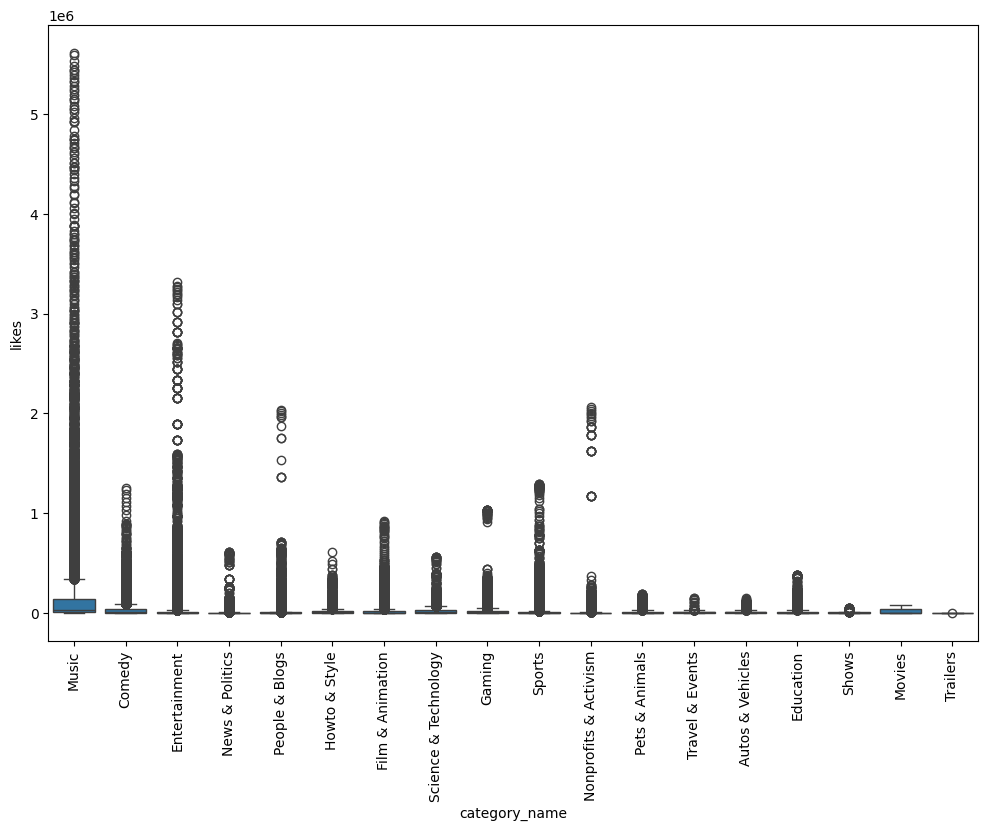

In [59]:
plt.figure(figsize=(12,8))
sns.boxplot(data=total_df ,x='category_name',y='likes')
plt.xticks(rotation='vertical')
plt.show()

### Conclusion-->>
Music category having more like followed by comedy , entertainment and so on...

---

## 8> Find out whether audience is engaged or not

In [60]:
total_df['like_rate'] = (total_df['likes']/total_df['views'])*100
total_df['dislike_rate'] = (total_df['dislikes']/total_df['views'])*100
total_df['comment_count_rate'] = (total_df['comment_count']/total_df['views'])*100

In [61]:
total_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

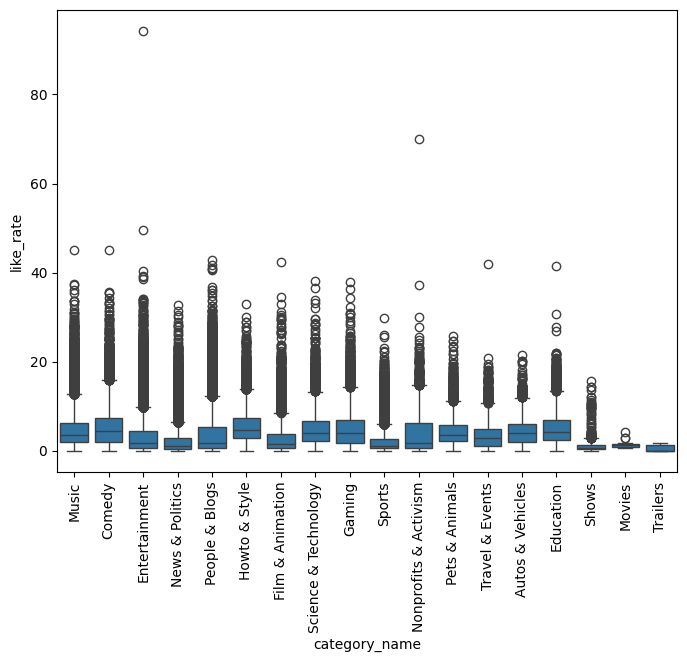

In [62]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name',y='like_rate',data=total_df)
plt.xticks(rotation='vertical')
plt.show()

### analysing relationship between views & likes

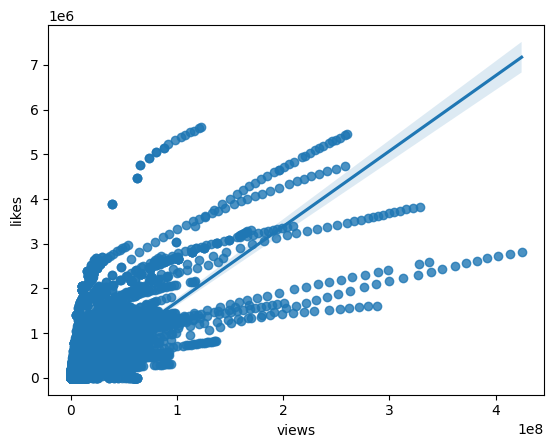

In [63]:
sns.regplot(data=total_df,x='views',y='likes')
plt.show()

### Conclusion-->>
views are co-related to likes

In [64]:
total_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [65]:
total_df_corr = total_df[['views','likes','dislikes']].corr()
total_df_corr

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


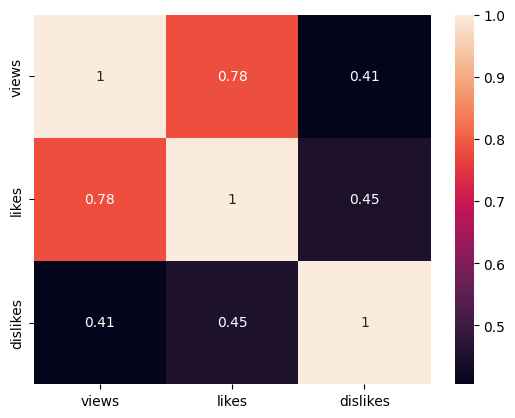

In [66]:
sns.heatmap(total_df_corr,annot=True)
plt.show()

---

## 9> Which channels have the largest number of trending videos ?

In [67]:
total_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,âº Follow for News! - https://twitter.com/KEE...,News & Politics,7.922049,0.352218,0.927160


In [68]:
total_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
The Secrets of Dairy                    1
babygranderecords                       1
24 Oras News Today                      1
turk2doubleoh8                          1
BOOMPANOT.COM                           1
Name: count, Length: 37824, dtype: int64

- using groupby approach ->

In [69]:
cdf = total_df.groupby('channel_title').size().sort_values(ascending=False).reset_index()
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Tesoros Enterrados,1
37820,Anton Neverov,1
37821,Thalia 444,1
37822,Thaitv6 Official,1


In [70]:
cdf = cdf.rename(columns={0:'total_videos'})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Tesoros Enterrados,1
37820,Anton Neverov,1
37821,Thalia 444,1
37822,Thaitv6 Official,1


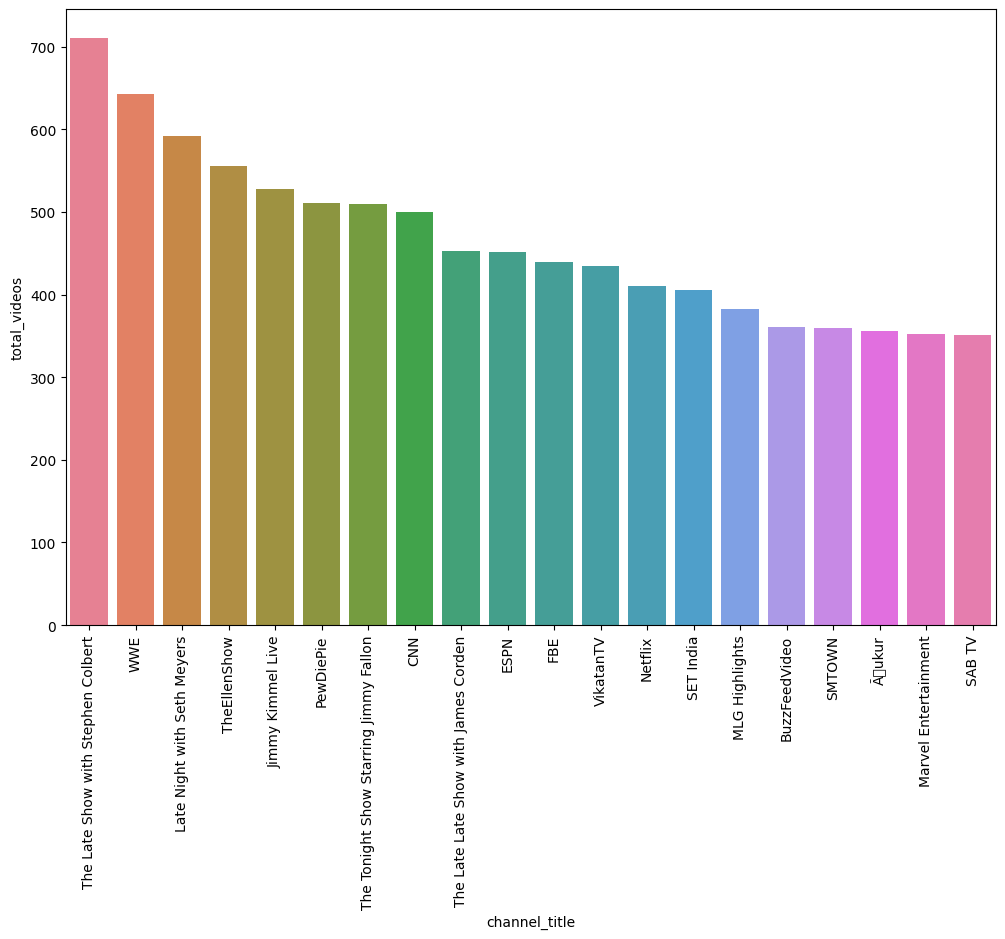

In [71]:
plt.figure(figsize=(12,8))
sns.barplot(data=cdf[:20],x='channel_title',y='total_videos',hue='channel_title')
plt.xticks(rotation=90)
plt.show()

---

## 10> Let's see if punctuations in title and tags have any relation with views, likes, dislikes comments?

In [72]:
total_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [73]:
import string

In [74]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [98]:
total_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [75]:
len([char for char in total_df['title'][0] if char in string.punctuation])

4

In [76]:
total_df['count_punc'] = total_df['title'].apply(lambda x: 
    len([char for char in x if char in string.punctuation]))

In [77]:
total_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate,count_punc
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342,3
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851,3
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752,3


In [78]:
sample_groupby = total_df[:10000].groupby(['count_punc'])['views'].max().sort_values(ascending=False).reset_index()

In [79]:
sample_groupby

,count_punc,views
0,3,137843120
1,2,89930713
2,4,36971093
3,0,35696481
4,1,33896316
5,5,32777142
6,6,27670973
7,8,25184395
8,7,20956090
9,11,3450639


In [80]:
sample = total_df[:10000]

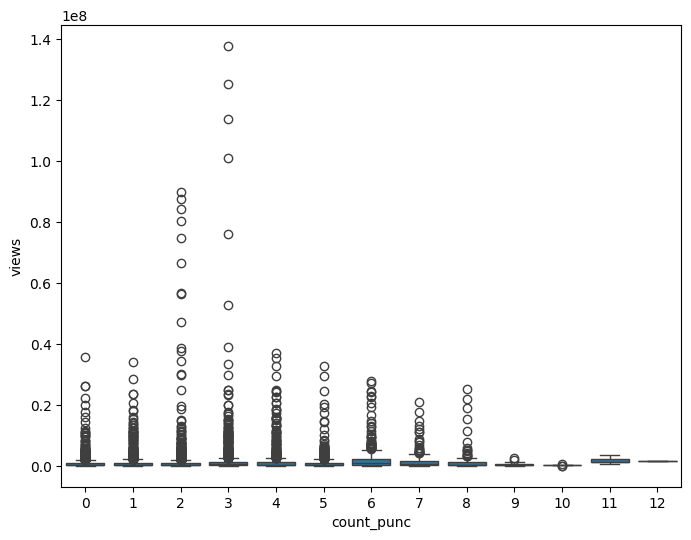

In [81]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='views' , data=sample)
plt.show()

In [82]:
sample_groupby = total_df[:10000].groupby(['count_punc'])['likes'].max().sort_values(ascending=False).reset_index()
sample_groupby

,count_punc,likes
0,3,3014479
1,2,2606665
2,6,2542863
3,1,1176798
4,5,965597
5,4,891283
6,8,553602
7,0,513217
8,7,488364
9,12,97313


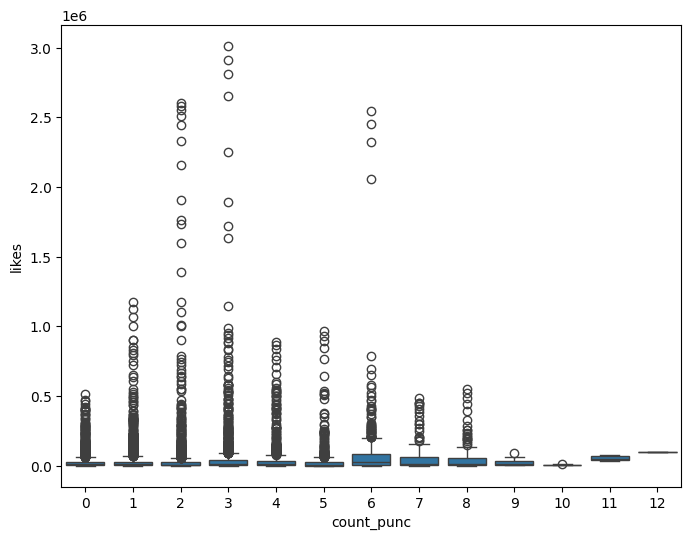

In [83]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='likes' , data=sample)
plt.show()

In [84]:
sample_groupby = total_df[:10000].groupby(['count_punc'])['dislikes'].max().sort_values(ascending=False).reset_index()
sample_groupby

,count_punc,dislikes
0,3,1602383
1,7,504340
2,0,190227
3,4,154598
4,8,108783
5,2,87444
6,1,84384
7,5,64107
8,6,43698
9,11,16076


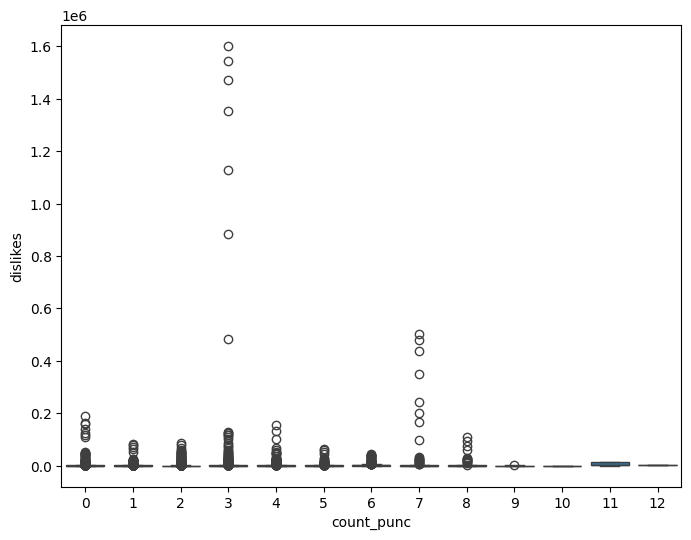

In [85]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='dislikes' , data=sample)
plt.show()

### Conclusion-->>
for 3 punctuations their is likely more likes,views and dislikes.

---

## 📌 Final Conclusions

- The dataset was successfully cleaned, and missing or malformed entries were handled properly.
- Sentiment analysis using TextBlob gave insight into user opinions through polarity scores.
- Emoji frequency analysis revealed popular emotional expressions in comments.
- A vibrant bar chart helped visualize the most commonly used emojis.
- Category mapping helped relate numerical IDs to understandable video categories.
- GroupBy operations revealed category-wise engagement through likes.
- Proper use of `.loc` and `.copy()` avoided `SettingWithCopyWarning`.
- Efficient file reading was done using `os.listdir()` and `os.path.join()` for safe paths.
- Google Drive and GitHub usage best practices were explained, including Git LFS for large files.

Overall, the analysis pipeline demonstrates how textual, visual, and categorical data from YouTube can be processed to derive meaningful insights.
